In [1]:
#Sathvika Tirupathi
# Importing the necessary libraries
import pandas as pd

# Loading the dataset
austin_housing_df = pd.read_csv('HousingDataMainAustin.csv')

# Displaying the first few rows of the dataset to understand its structure
print(austin_housing_df.head())

# Getting the general information about the dataset
austin_housing_df.info()

        zpid       city  zipcode  propertyTaxRate  garageSpaces  \
0   83827468  del valle    78617             1.98             2   
1  241930967  del valle    78617             1.98             0   
2   69808966  del valle    78617             1.98             2   
3   64520966  del valle    78617             1.98             0   
4   83813460  del valle    78617             1.98             2   

   hasAssociation  hasCooling  hasGarage  hasHeating  hasSpa  ...  \
0            True        True       True        True   False  ...   
1            True        True      False        True   False  ...   
2            True        True       True        True   False  ...   
3            True        True      False        True   False  ...   
4            True        True       True        True   False  ...   

   numOfHighSchools avgSchoolDistance  avgSchoolRating  avgSchoolSize  \
0                 1          1.200000         3.000000           1615   
1                 1          1.20000

In [2]:
# Getting the general information about the dataset
austin_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   zipcode                     15171 non-null  int64  
 3   propertyTaxRate             15171 non-null  float64
 4   garageSpaces                15171 non-null  int64  
 5   hasAssociation              15171 non-null  bool   
 6   hasCooling                  15171 non-null  bool   
 7   hasGarage                   15171 non-null  bool   
 8   hasHeating                  15171 non-null  bool   
 9   hasSpa                      15171 non-null  bool   
 10  hasView                     15171 non-null  bool   
 11  homeType                    15171 non-null  object 
 12  parkingSpaces               15171 non-null  int64  
 13  yearBuilt                   151

In [3]:
# Checking for missing values in each column
missing_values = austin_housing_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Checking for columns with any missing values
columns_with_missing_values = missing_values[missing_values > 0].index.tolist()
print("Columns with missing values:", columns_with_missing_values)


Missing values in each column:
 zpid                          0
city                          0
zipcode                       0
propertyTaxRate               0
garageSpaces                  0
hasAssociation                0
hasCooling                    0
hasGarage                     0
hasHeating                    0
hasSpa                        0
hasView                       0
homeType                      0
parkingSpaces                 0
yearBuilt                     0
latestPrice                   0
numPriceChanges               0
latest_saledate               0
latest_salemonth              0
latest_saleyear               0
latestPriceSource             0
numOfPhotos                   0
numOfAccessibilityFeatures    0
numOfAppliances               0
numOfParkingFeatures          0
numOfPatioAndPorchFeatures    0
numOfSecurityFeatures         0
numOfWaterfrontFeatures       0
numOfWindowFeatures           0
numOfCommunityFeatures        0
lotSizeSqFt                   0
livingAr

In [4]:
austin_housing_df.dtypes

zpid                            int64
city                           object
zipcode                         int64
propertyTaxRate               float64
garageSpaces                    int64
hasAssociation                   bool
hasCooling                       bool
hasGarage                        bool
hasHeating                       bool
hasSpa                           bool
hasView                          bool
homeType                       object
parkingSpaces                   int64
yearBuilt                       int64
latestPrice                     int64
numPriceChanges                 int64
latest_saledate                object
latest_salemonth                int64
latest_saleyear                 int64
latestPriceSource              object
numOfPhotos                     int64
numOfAccessibilityFeatures      int64
numOfAppliances                 int64
numOfParkingFeatures            int64
numOfPatioAndPorchFeatures      int64
numOfSecurityFeatures           int64
numOfWaterfr

In [5]:
# Converting 'latest_saledate' from object to datetime
austin_housing_df['latest_saledate'] = pd.to_datetime(austin_housing_df['latest_saledate'])

# Converting object types to category for categorical data
categorical_columns = ['city', 'homeType', 'latestPriceSource']
austin_housing_df[categorical_columns] = austin_housing_df[categorical_columns].astype('category')

# Verifying changes
austin_housing_df.dtypes

C:\Users\kypra\AppData\Local\Temp\ipykernel_24704\592274299.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  austin_housing_df['latest_saledate'] = pd.to_datetime(austin_housing_df['latest_saledate'])


zpid                                   int64
city                                category
zipcode                                int64
propertyTaxRate                      float64
garageSpaces                           int64
hasAssociation                          bool
hasCooling                              bool
hasGarage                               bool
hasHeating                              bool
hasSpa                                  bool
hasView                                 bool
homeType                            category
parkingSpaces                          int64
yearBuilt                              int64
latestPrice                            int64
numPriceChanges                        int64
latest_saledate               datetime64[ns]
latest_salemonth                       int64
latest_saleyear                        int64
latestPriceSource                   category
numOfPhotos                            int64
numOfAccessibilityFeatures             int64
numOfAppli

In [8]:
# Descriptive statistics for numerical variables
numerical_stats = austin_housing_df.describe()
numerical_stats

,zpid,zipcode,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_salemonth,latest_saleyear,...,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,Population,Average Income
count,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,1.517100e+04,15171.000000,15171.000000,15171.000000,...,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000
mean,1.044193e+08,78735.932964,1.994085,1.229187,1.224507,1988.554743,5.127677e+05,3.032892,6.733043,2019.078241,...,0.976798,1.838495,5.779912,1237.304660,14.857228,2.683010,3.440380,1.467273,34052.008899,87.421628
std,3.179426e+08,18.893475,0.053102,1.352117,1.352732,21.579458,4.531853e+05,2.487392,3.146760,0.813941,...,0.292043,1.068376,1.860276,326.513311,1.741857,1.054445,0.849942,0.523697,15751.996468,61.330977
min,2.858495e+07,78617.000000,1.980000,0.000000,0.000000,1905.000000,5.500000e+03,1.000000,1.000000,2018.000000,...,0.000000,0.200000,2.333333,396.000000,10.000000,0.000000,0.000000,1.000000,964.000000,29.157143
25%,2.941115e+07,78727.000000,1.980000,0.000000,0.000000,1974.000000,3.090000e+05,1.000000,4.000000,2018.000000,...,1.000000,1.100000,4.000000,966.000000,14.000000,2.000000,3.000000,1.000000,21854.000000,47.095133
50%,2.949441e+07,78739.000000,1.980000,1.000000,1.000000,1993.000000,4.050000e+05,2.000000,7.000000,2019.000000,...,1.000000,1.566667,5.778694,1287.000000,15.000000,3.000000,3.000000,1.000000,29928.000000,66.652941
75%,7.033762e+07,78749.000000,1.980000,2.000000,2.000000,2006.000000,5.750000e+05,4.000000,9.000000,2020.000000,...,1.000000,2.266667,7.000000,1496.000000,16.000000,3.000000,4.000000,2.000000,49197.000000,95.218381
max,2.146313e+09,78759.000000,2.210000,22.000000,22.000000,2020.000000,1.350000e+07,23.000000,12.000000,2021.000000,...,2.000000,9.000000,9.500000,1913.000000,19.000000,27.000000,20.000000,4.000000,110955.000000,380.798949


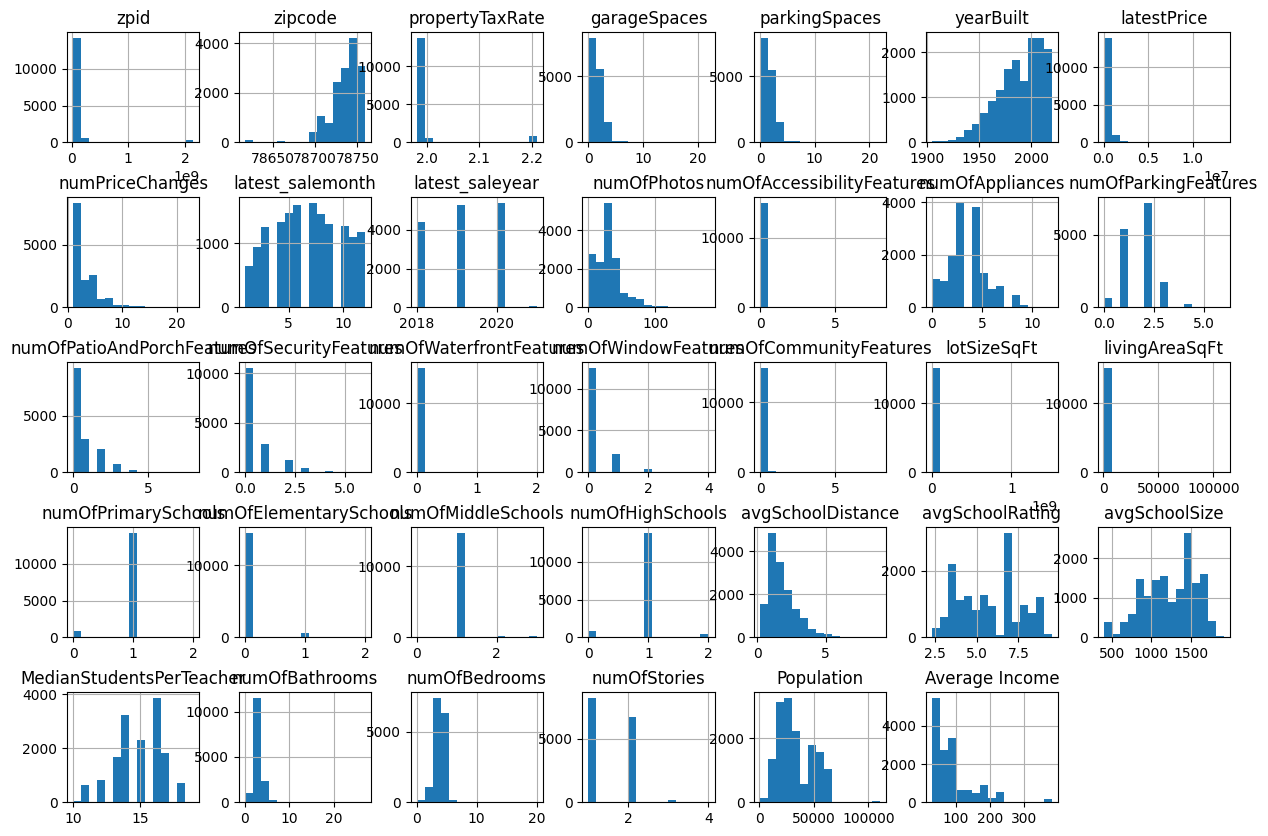

In [9]:
import matplotlib.pyplot as plt

# Histograms for numerical variables
austin_housing_df.hist(bins=15, figsize=(15, 10), layout=(5, 7))
plt.subplots_adjust(hspace=0.5)
plt.show()


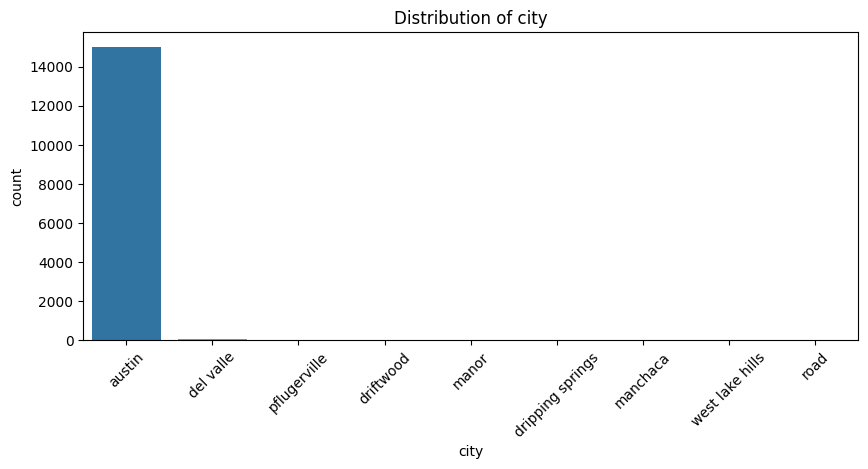

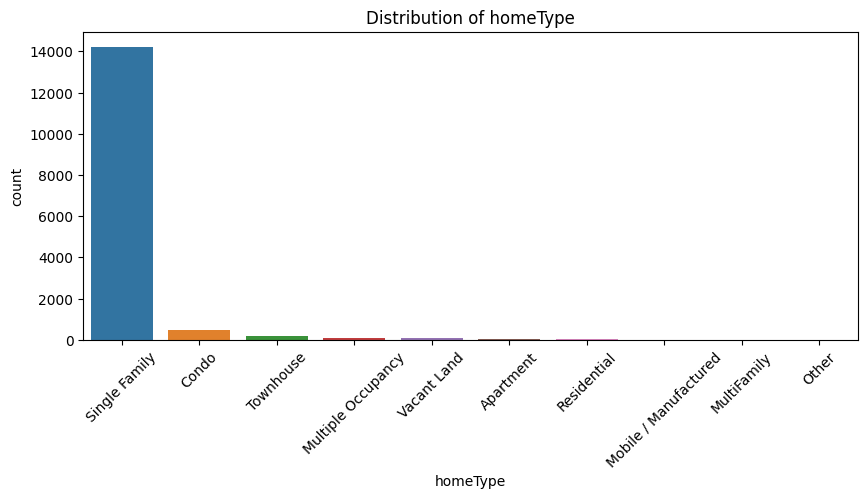

In [11]:
import seaborn as sns

# Frequency of categories in categorical variables
categorical_columns = ['city', 'homeType']
for column in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=austin_housing_df, x=column, order = austin_housing_df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()


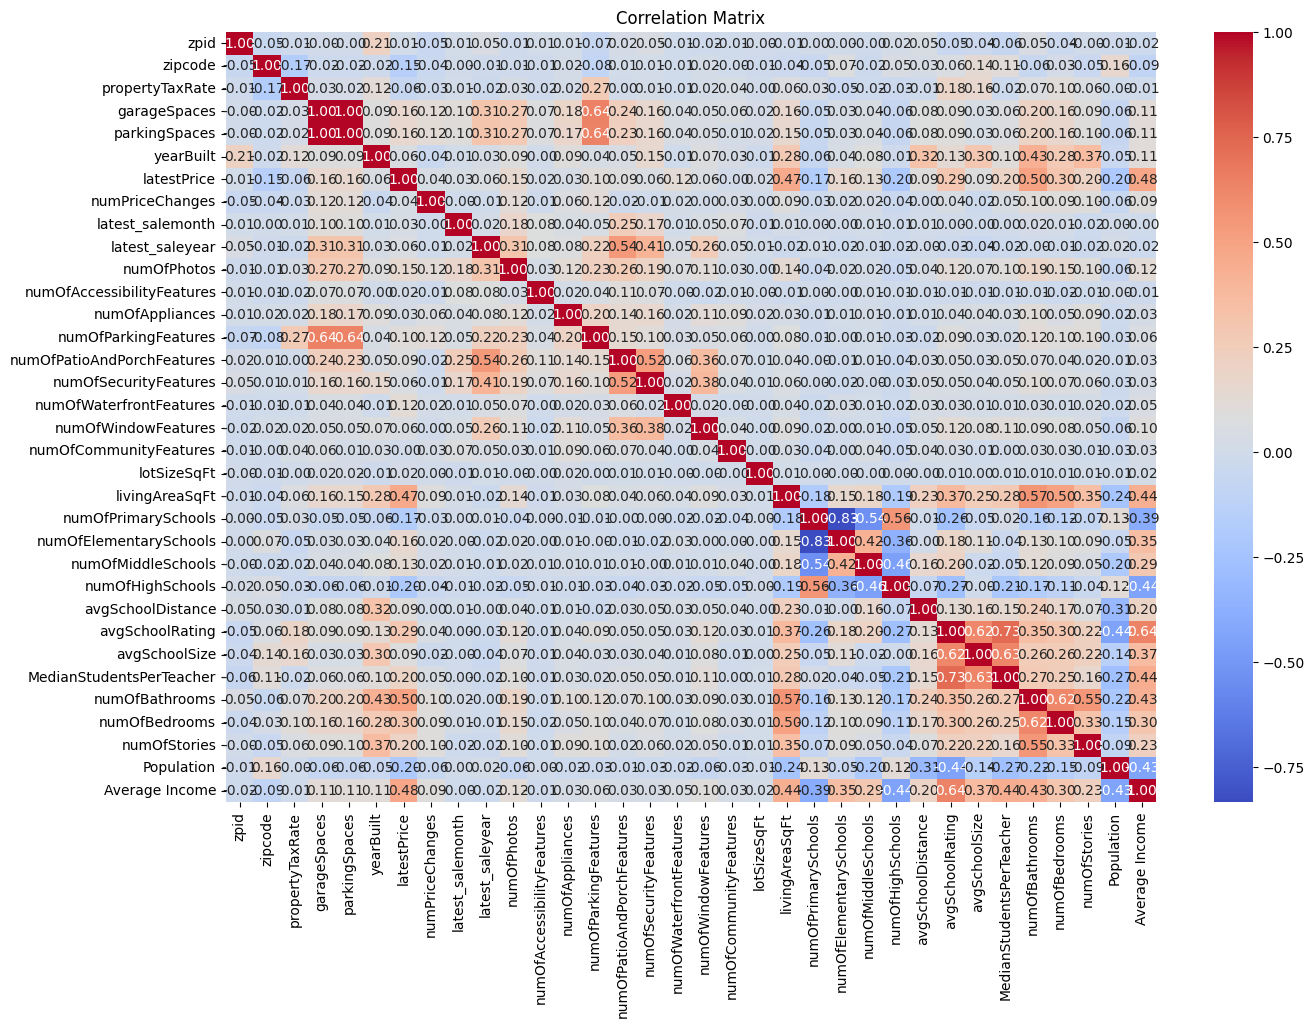

In [14]:
import numpy as np

# Exclude non-numeric columns and calculate the correlation matrix for numeric columns only
numeric_df = austin_housing_df.select_dtypes(include=[np.number])
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [15]:
numeric_df.corr()

,zpid,zipcode,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_salemonth,latest_saleyear,...,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,Population,Average Income
zpid,1.000000,-0.052805,-0.011396,-0.001927,-0.001410,0.213280,0.007503,-0.049541,0.012119,0.053438,...,0.017113,0.047420,-0.048422,-0.035425,-0.064781,0.052729,-0.037354,-0.001502,-0.012999,-0.022882
zipcode,-0.052805,1.000000,-0.172846,-0.016600,-0.016687,-0.016143,-0.145946,-0.043115,0.000116,-0.011057,...,0.054053,0.027830,0.055618,0.140192,0.106682,-0.055685,0.025278,-0.051818,0.161844,-0.093674
propertyTaxRate,-0.011396,-0.172846,1.000000,0.026430,0.024371,0.118247,-0.062179,-0.028945,0.005714,-0.024598,...,-0.034695,-0.011178,0.184755,0.158509,-0.021681,0.066139,0.098455,0.057537,-0.004421,-0.008449
garageSpaces,-0.001927,-0.016600,0.026430,1.000000,0.997321,0.085982,0.157443,0.120748,0.102118,0.311164,...,-0.064993,0.079953,0.092672,0.034451,0.062567,0.199309,0.163637,0.094983,-0.062276,0.112398
parkingSpaces,-0.001410,-0.016687,0.024371,0.997321,1.000000,0.085655,0.156811,0.121268,0.096451,0.307044,...,-0.064237,0.078813,0.091906,0.033859,0.062395,0.198224,0.162546,0.095979,-0.061621,0.112270
yearBuilt,0.213280,-0.016143,0.118247,0.085982,0.085655,1.000000,0.059692,-0.043953,0.005624,0.027324,...,-0.013114,0.324713,0.134781,0.296456,0.099023,0.430429,0.275688,0.369571,-0.049164,0.109411
latestPrice,0.007503,-0.145946,-0.062179,0.157443,0.156811,0.059692,1.000000,0.038305,0.033898,0.059942,...,-0.201821,0.094156,0.293101,0.085167,0.198208,0.504738,0.299839,0.200555,-0.204947,0.480589
numPriceChanges,-0.049541,-0.043115,-0.028945,0.120748,0.121268,-0.043953,0.038305,1.000000,-0.003072,-0.007620,...,-0.039603,0.004918,0.041357,-0.024041,0.047290,0.098717,0.093767,0.097000,-0.057423,0.091878
latest_salemonth,0.012119,0.000116,0.005714,0.102118,0.096451,0.005624,0.033898,-0.003072,1.000000,0.016185,...,-0.010901,0.007407,0.001604,-0.004363,0.004086,0.019469,0.014333,-0.023502,0.004950,-0.002998
latest_saleyear,0.053438,-0.011057,-0.024598,0.311164,0.307044,0.027324,0.059942,-0.007620,0.016185,1.000000,...,-0.020371,-0.000093,-0.029494,-0.043112,-0.023830,-0.003954,-0.005406,-0.024535,0.018157,-0.020602


In [16]:
# Dropping redundant or low-impact features
features_to_drop = ['parkingSpaces', 'zpid', 'latest_saleyear']
austin_housing_df.drop(columns=features_to_drop, inplace=True)

# Display the updated DataFrame's information to confirm the drops
print(austin_housing_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        15171 non-null  object 
 1   zipcode                     15171 non-null  int64  
 2   propertyTaxRate             15171 non-null  float64
 3   garageSpaces                15171 non-null  int64  
 4   hasAssociation              15171 non-null  bool   
 5   hasCooling                  15171 non-null  bool   
 6   hasGarage                   15171 non-null  bool   
 7   hasHeating                  15171 non-null  bool   
 8   hasSpa                      15171 non-null  bool   
 9   hasView                     15171 non-null  bool   
 10  homeType                    15171 non-null  object 
 11  yearBuilt                   15171 non-null  int64  
 12  latestPrice                 15171 non-null  int64  
 13  numPriceChanges             151

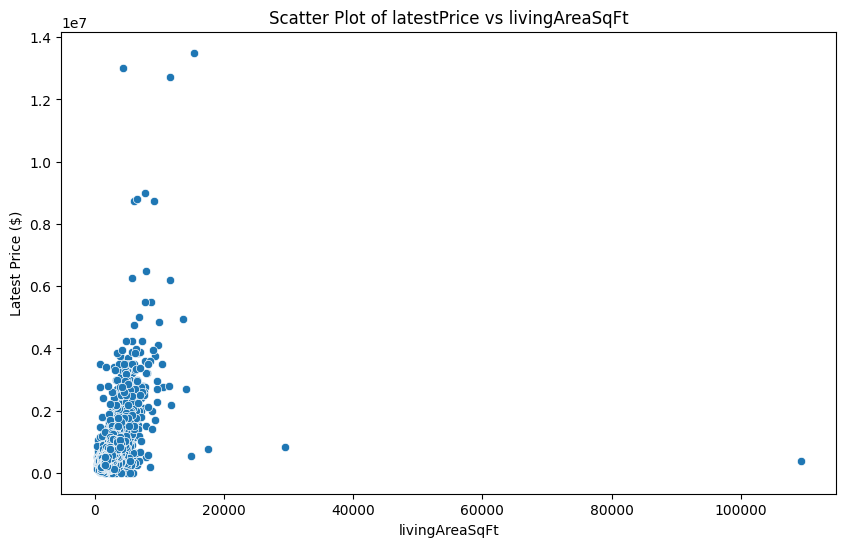

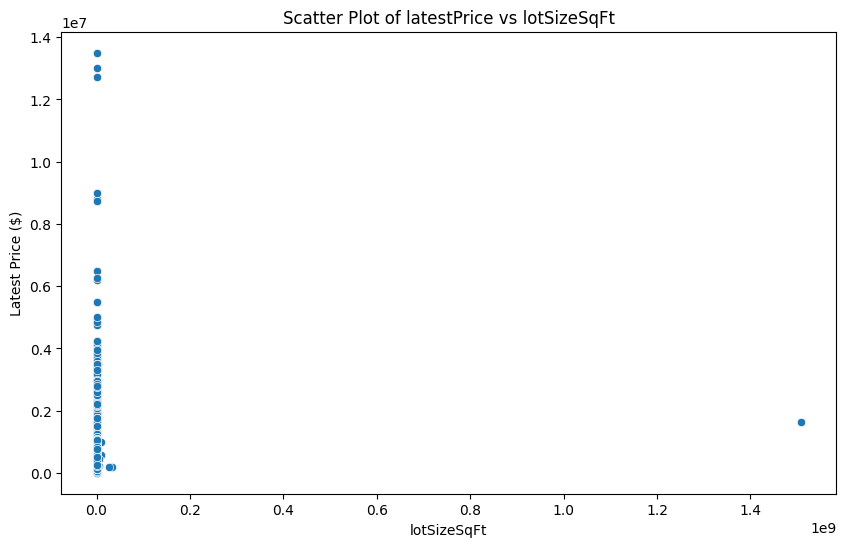

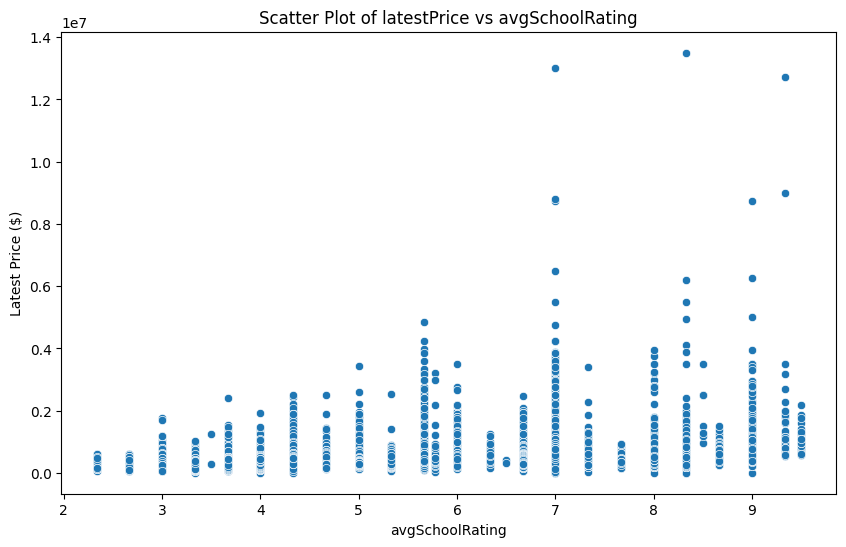

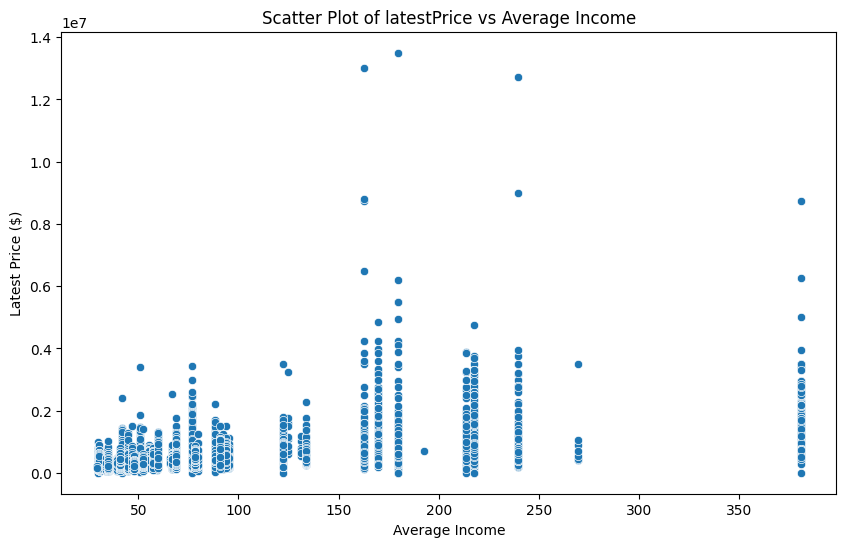

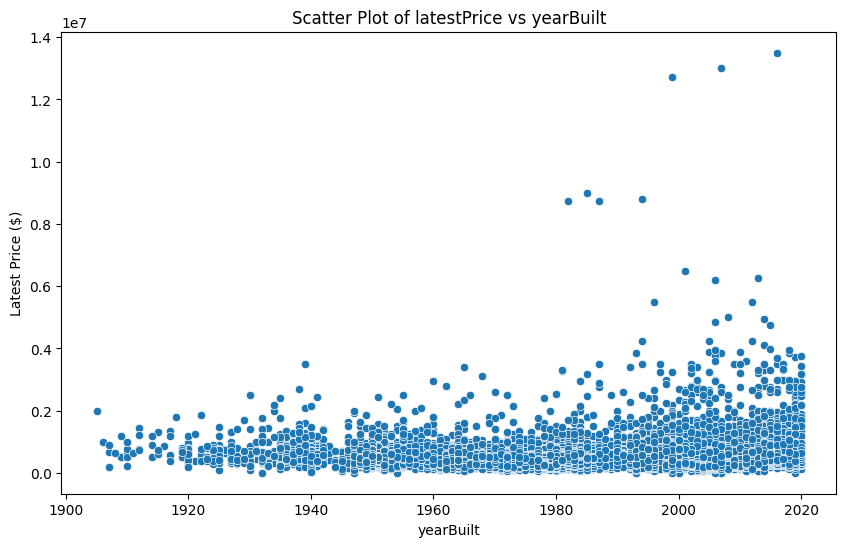

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Influential numerical variables identified from the correlation matrix
numerical_variables = ['livingAreaSqFt', 'lotSizeSqFt', 'avgSchoolRating', 'Average Income', 'yearBuilt']

# Creating scatter plots
for var in numerical_variables:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=austin_housing_df, x=var, y='latestPrice')
    plt.title(f'Scatter Plot of latestPrice vs {var}')
    plt.xlabel(var)
    plt.ylabel('Latest Price ($)')
    plt.show()


C:\Users\kypra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kypra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kypra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kypra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

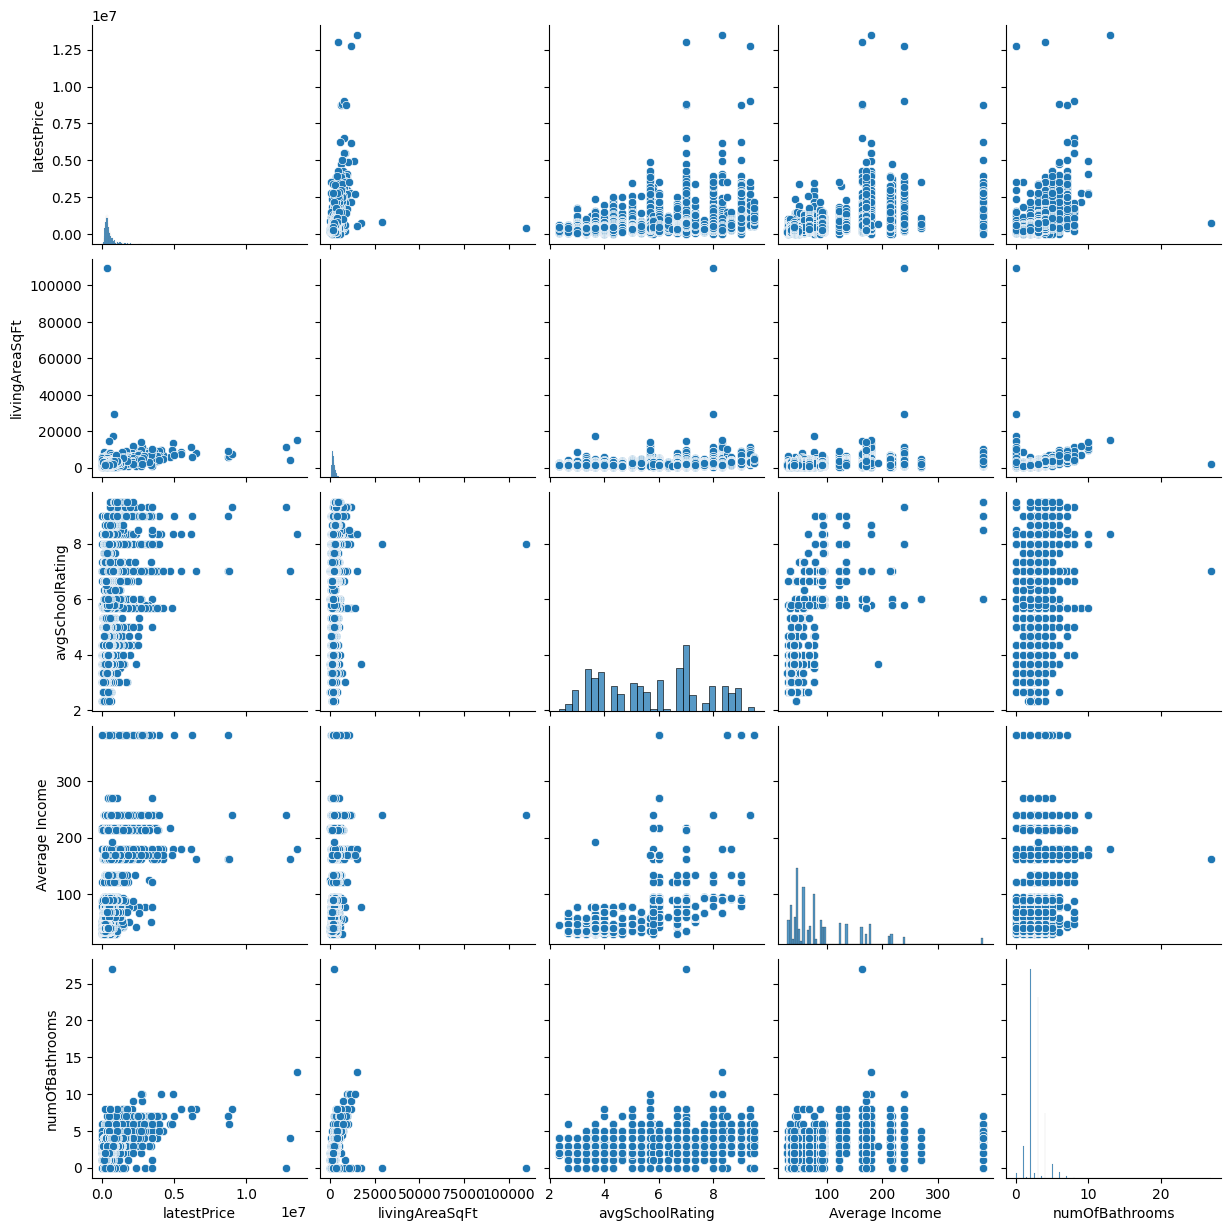

In [19]:
# Select a few variables to see pairwise relationships
selected_columns = ['latestPrice', 'livingAreaSqFt', 'avgSchoolRating', 'Average Income', 'numOfBathrooms']
sns.pairplot(austin_housing_df[selected_columns])
plt.show()


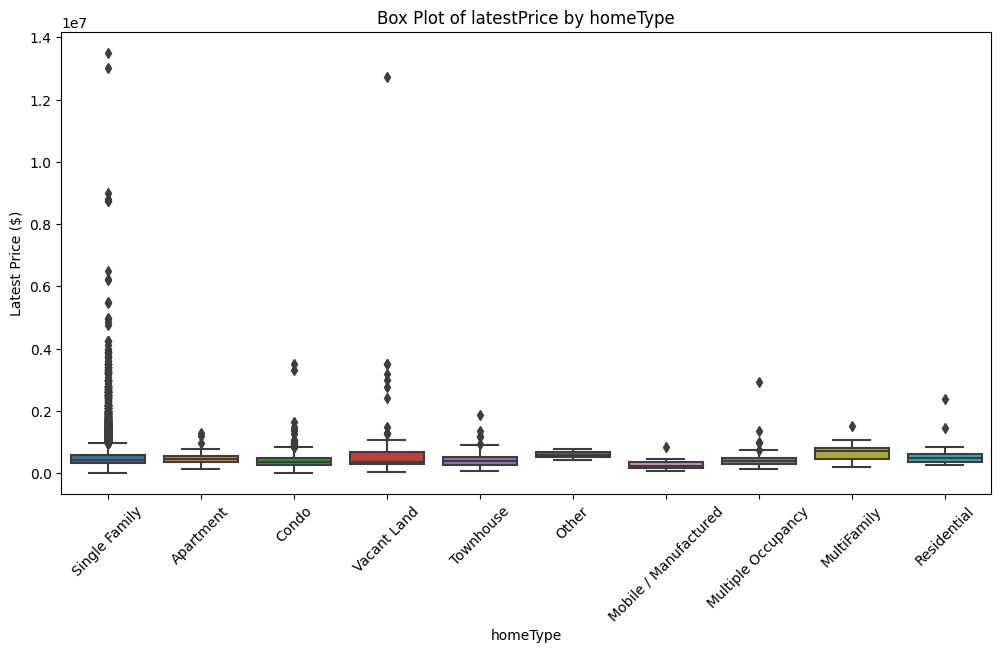

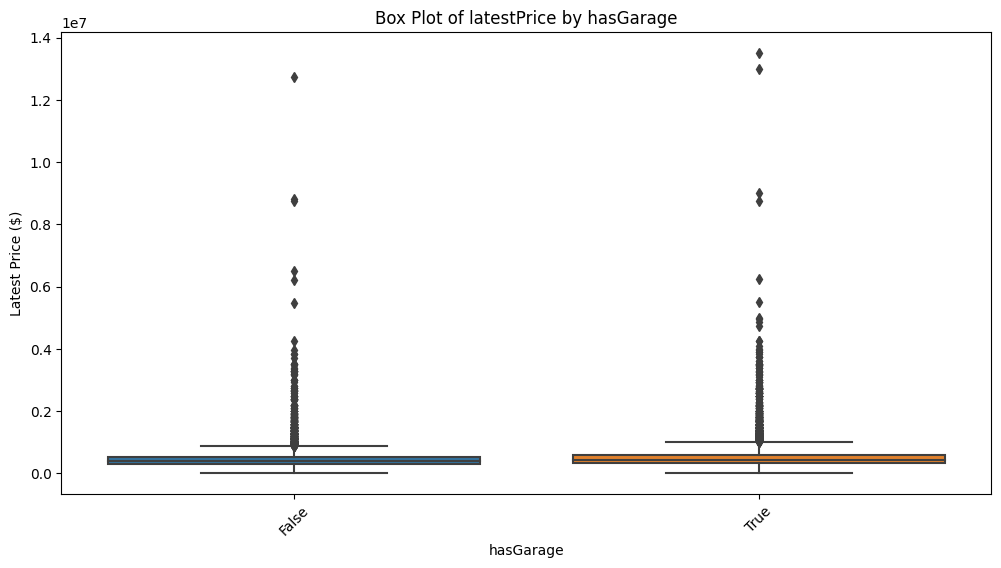

In [22]:
# Influential categorical variables
categorical_variables = ['homeType', 'hasGarage']

# Creating box plots
for var in categorical_variables:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=var, y='latestPrice', data=austin_housing_df)
    plt.title(f'Box Plot of latestPrice by {var}')
    plt.xticks(rotation=45)
    plt.xlabel(var)
    plt.ylabel('Latest Price ($)')
    plt.show()


In [30]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Calculate the correlation matrix for numeric columns
numeric_df = austin_housing_df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# Identify columns that have a correlation above a certain threshold with 'latestPrice'
threshold = 0.2
high_corr_features = corr_matrix.index[abs(corr_matrix["latestPrice"]) > threshold].tolist()
high_corr_features.remove('latestPrice')  # Remove the target variable from the feature list

print("Highly correlated features:", high_corr_features)

# Selecting these features and the target variable
X = numeric_df[high_corr_features]
y = numeric_df['latestPrice']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# StandardScaler to normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Models
# Model 1: Baseline Linear Regression
lr_model1 = LinearRegression()
lr_model1.fit(X_train, y_train)  # Using unscaled data
y_pred_lr1 = lr_model1.predict(X_test)

# Model 2: Linear Regression with Polynomial Features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
lr_model2 = LinearRegression()
lr_model2.fit(X_train_poly, y_train)
y_pred_lr2 = lr_model2.predict(X_test_poly)

# Random Forest Models
# Model 3: Random Forest with basic parameters
rf_model1 = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model1.fit(X_train_scaled, y_train)
y_pred_rf1 = rf_model1.predict(X_test_scaled)

# Model 4: Random Forest with advanced parameters
rf_model2 = RandomForestRegressor(n_estimators=200, max_depth=15, min_samples_split=10, max_features='sqrt', random_state=42)
rf_model2.fit(X_train_scaled, y_train)
y_pred_rf2 = rf_model2.predict(X_test_scaled)

# Function to print model evaluation metrics
def print_evaluation_metrics(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse}, R^2 Score: {r2}")

# Evaluating all models
print_evaluation_metrics(y_test, y_pred_lr1, 'Linear Regression 1')
print_evaluation_metrics(y_test, y_pred_lr2, 'Linear Regression 2')
print_evaluation_metrics(y_test, y_pred_rf1, 'Random Forest 1')
print_evaluation_metrics(y_test, y_pred_rf2, 'Random Forest 2')

# Function to plot results with updated residplot usage
def plot_results(y_test, y_pred, title):
    plt.figure(figsize=(12, 6))
    
    # Plot Predicted vs Actual
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Plotting the line y=x for reference
    plt.title(title + ' - Predicted vs Actual')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')

    # Plot Residual Plot
    plt.subplot(1, 2, 2)
    sns.residplot(x=y_test, y=y_test - y_pred, lowess=True, color="g", scatter_kws={'alpha': 0.5})
    plt.title(title + ' - Residual Plot')
    plt.xlabel('Actual Price')
    plt.ylabel('Residuals')
    
    plt.show()

Highly correlated features: ['livingAreaSqFt', 'numOfHighSchools', 'avgSchoolRating', 'numOfBathrooms', 'numOfBedrooms', 'numOfStories', 'Population', 'Average Income']
Linear Regression 1 - Mean Squared Error: 83177614296.83794, R^2 Score: 0.4585744097567146
Linear Regression 2 - Mean Squared Error: 67795186535.73368, R^2 Score: 0.5587027928599937
Random Forest 1 - Mean Squared Error: 50143966504.42206, R^2 Score: 0.6735993585376451
Random Forest 2 - Mean Squared Error: 43269596737.86291, R^2 Score: 0.7183464908024302


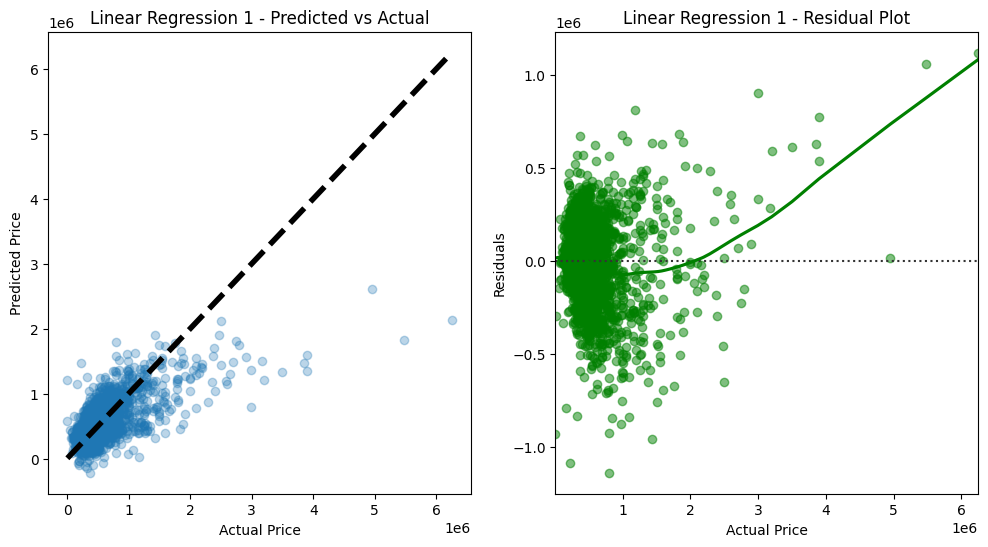

In [31]:
plot_results(y_test, y_pred_lr1, 'Linear Regression 1')

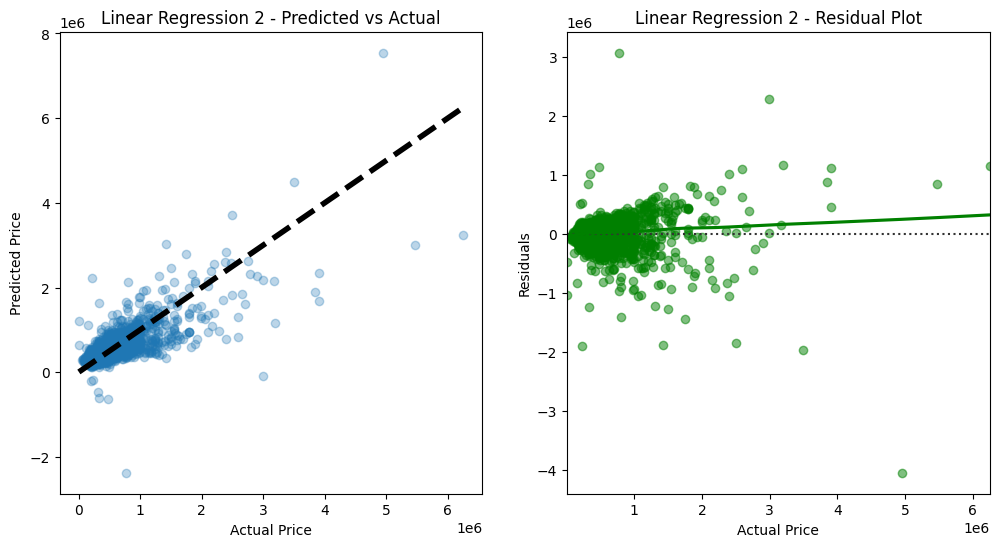

In [32]:
plot_results(y_test, y_pred_lr2, 'Linear Regression 2')

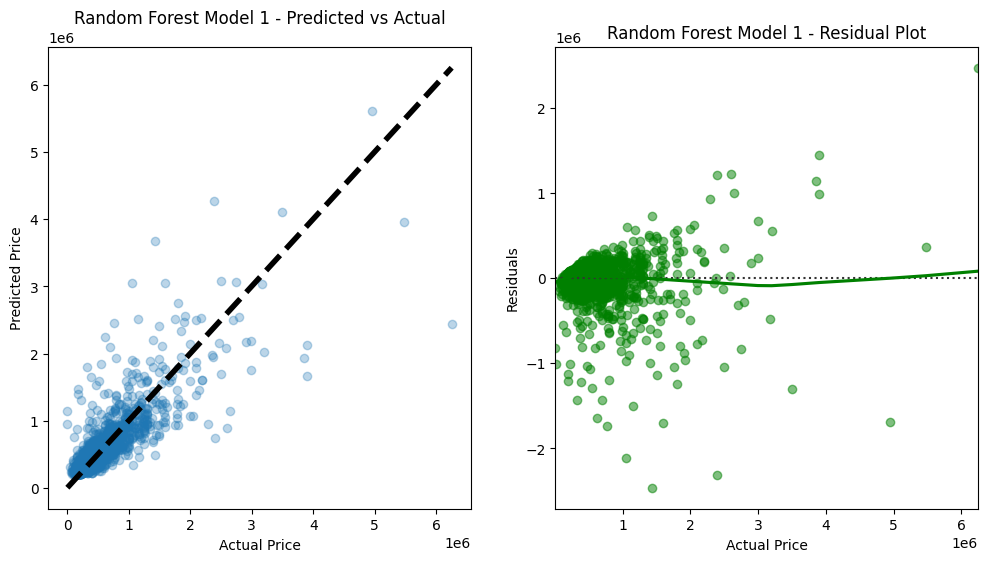

In [33]:
plot_results(y_test, y_pred_rf1, 'Random Forest Model 1')

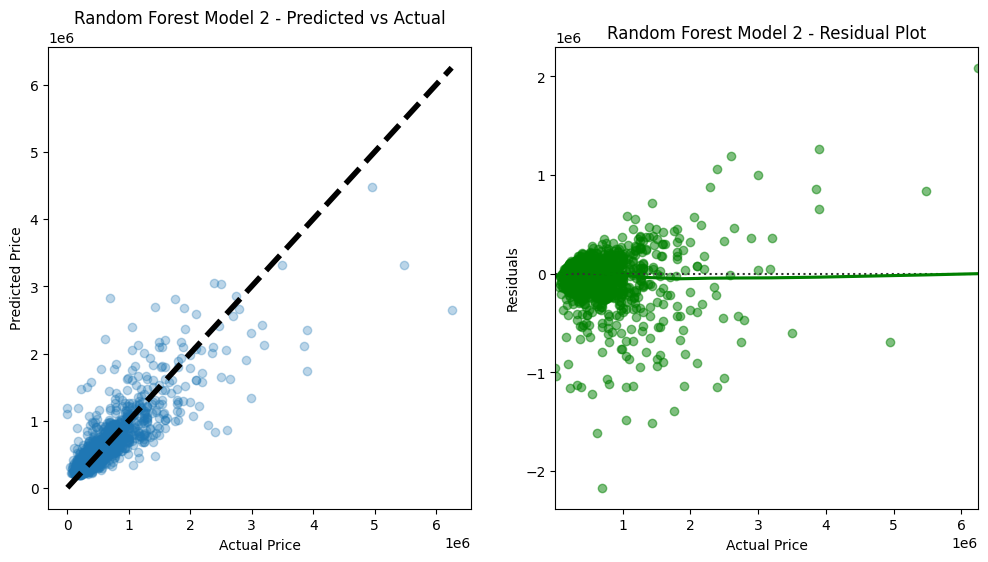

In [34]:
plot_results(y_test, y_pred_rf2, 'Random Forest Model 2')